## **Making imports**

In [90]:
# For loading DataFrame
import pandas as pd
# Functions for advanced analytics 
from Functions.advanced_analytic import AdvancedAnalyticBusiness
from Functions.b2b_b2c import B2bOrB2cAnalytics
from Functions.business_model import BusinessModel
from Functions.cloud_platform_based import CloudPlatformBased
from Functions.company_awards import CompanyAwards
from Functions.company_focus import CompanyFocus
from Functions.company_industry import IndustryAnalyzing
from Functions.consumer_data_focus import ConsumerDataFocus
from Functions.founders_experience import FoundersExperience
from Functions.internet_activity import InternetActivity
from Functions.ml_data_preparing import MlDataPrepare
from Functions.product_service import ProductService
from Functions.startup_age import AgeDataAnalyzing
from Functions.subscription_based import SubscriptionBased
from Functions.team_grown import TeamGrown
from Functions.top_company_worked import TopCompanyAnalyze
# For ML model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# For saving model
from joblib import dump

## **Analyzing Data**

### **Loading DataFrame**

In [91]:
df = pd.read_csv(r"C:\Users\Mikayel\PycharmProjects\InternshipTask\Data\data.csv", encoding='latin-1')
columns_for_model = []

### **Age of company in years**

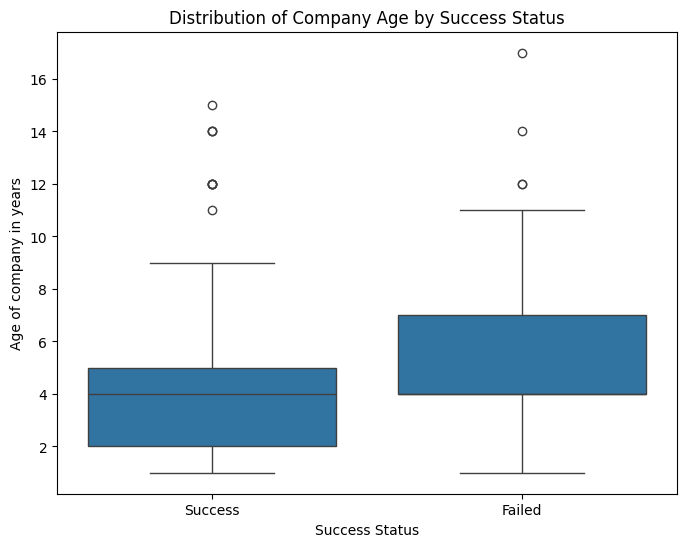

In [92]:
AgeAnalyze = AgeDataAnalyzing(dataframe=df)
AgeAnalyze.filling_age_missing_values()
AgeAnalyze.company_age_boxplot()

### **Internet Activity Score**

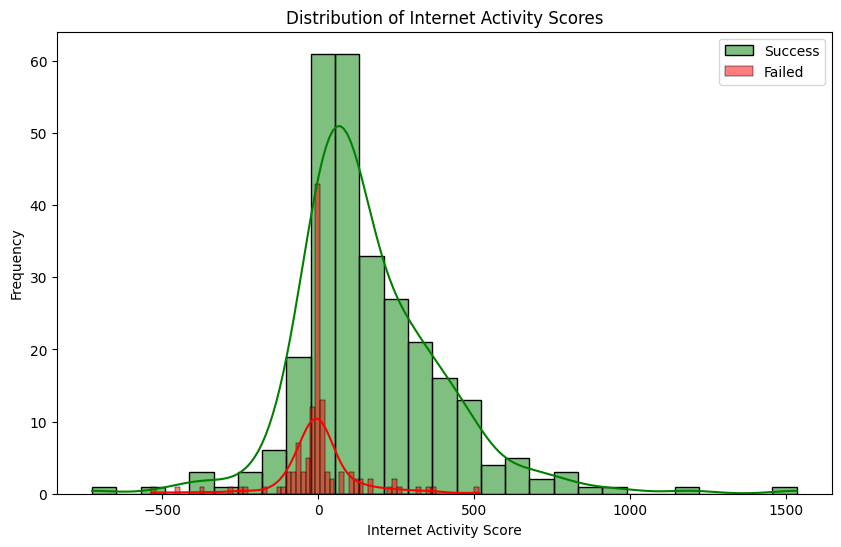

{'Early Stage': {'Failed': 31.254545454545458, 'Success': 184.79274611398964},
 'Established': {'Failed': -32.297872340425535, 'Success': 125.8076923076923},
 'Mature': {'Failed': 3.9047619047619064, 'Success': 101.87179487179488}}


In [93]:
InternetAnalyze = InternetActivity(dataframe=AgeAnalyze.df)
InternetAnalyze.analyze_internet_activity(plot=True)
columns_for_model.append('Internet Activity Score')

### **Industry of company**

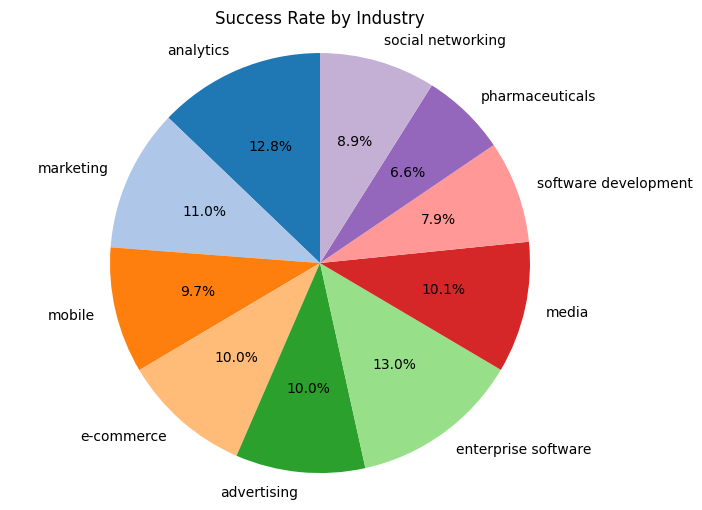

In [94]:
IndustryAnalyze = IndustryAnalyzing(dataframe=InternetAnalyze.df)
IndustryAnalyze.industry_success_distribution(pie_count=10, success=True)

### **Company Team Growth**

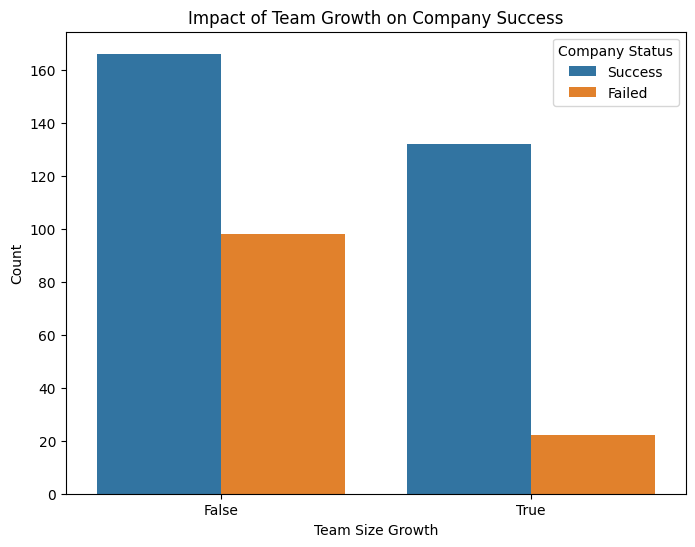

In [95]:
TeamGrowth = TeamGrown(IndustryAnalyze.df)
TeamGrowth.plot_team_growth_success()
columns_for_model.append('Has the team size grown')

### **Worked in top companies**

In [96]:
TopCompany = TopCompanyAnalyze(TeamGrowth.df)
TopCompany.analyze_data()
columns_for_model.append('Worked in top companies')

Success rate in a top company - 78.08219178082192
Success rate out of a top comapny - 65.94594594594595


### **Founders & cofounders experience**

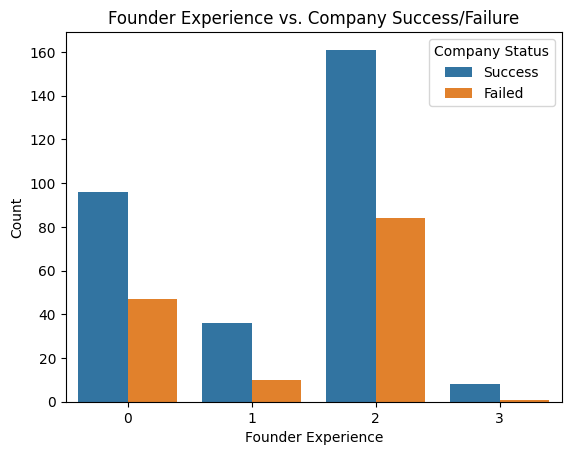

Success Rate for Founder Experience 0: 67.13%
Success Rate for Founder Experience 1: 78.26%
Success Rate for Founder Experience 2: 65.71%
Success Rate for Founder Experience 3: 88.89%


In [97]:
Founderexp = FoundersExperience(TopCompany.df)
Founderexp.plot_founder_experience_vs_success()
columns_for_model.append('Founder Experience')

### **Product or Service**

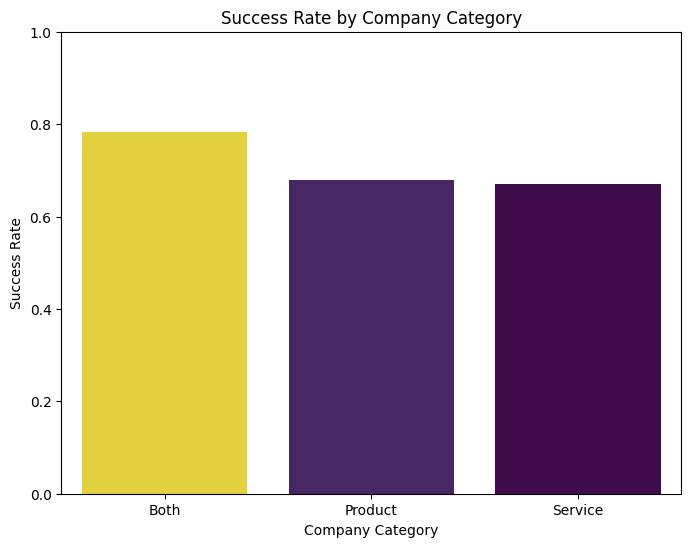

In [98]:
ProdServ = ProductService(Founderexp.df)
ProdServ.plot_success_by_category()

### **Consumer data dependence**

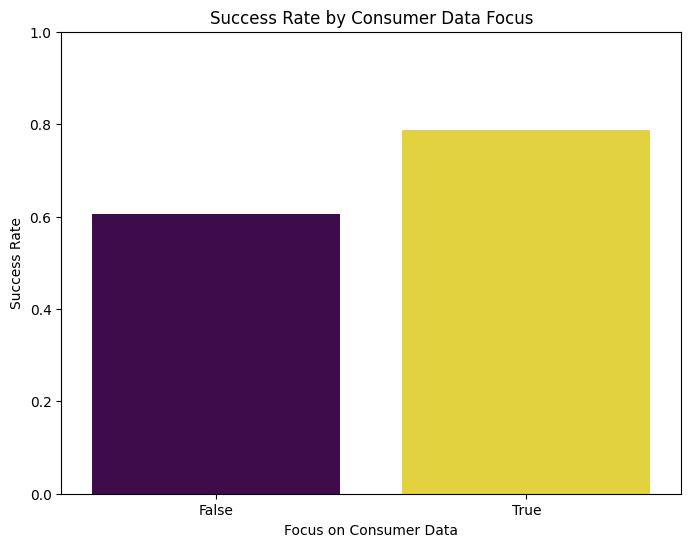

In [99]:
ConsumerData = ConsumerDataFocus(ProdServ.df)
ConsumerData.plot_success_dependence()
columns_for_model.append('Focus on consumer data?')

### **Subscription Based Companies**

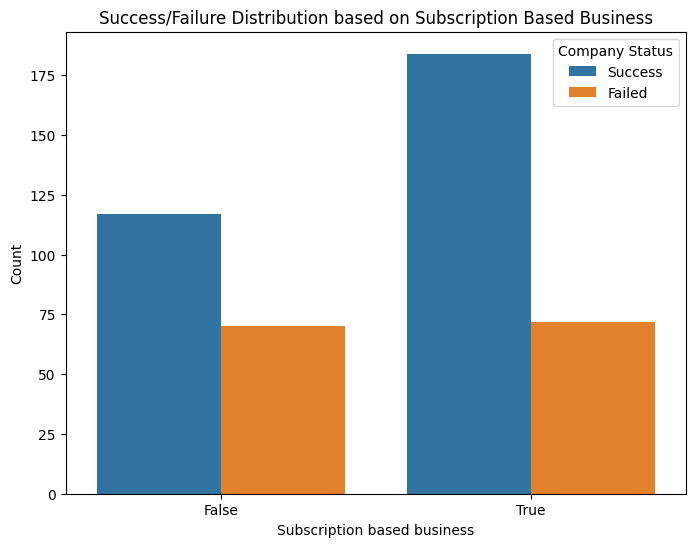

In [100]:
SubscriptionCompanies = SubscriptionBased(ConsumerData.df)
SubscriptionCompanies.plot_subscription_based()
columns_for_model.append('Subscription based business')

### **Cloud or platform based serivce/product?**

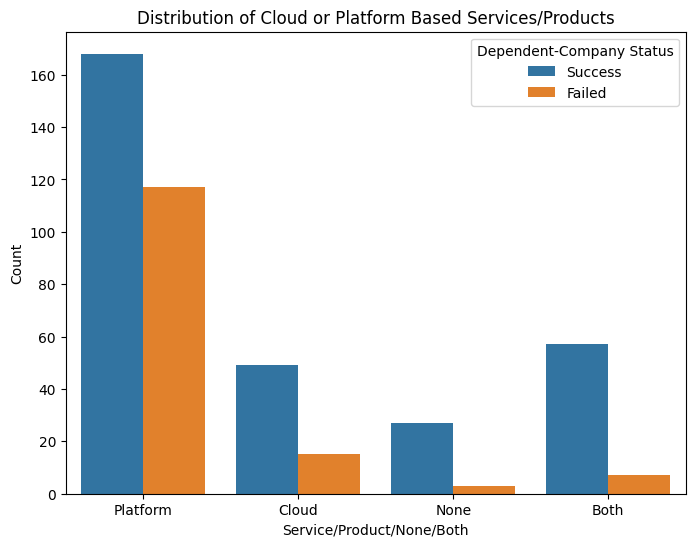

In [101]:
CloudPlatform = CloudPlatformBased(SubscriptionCompanies.df)
CloudPlatform.plot_dependence()
columns_for_model.append('Cloud or platform based serive/product?')

### **Advanced Analytics**

In [102]:
Advancedbusiness = AdvancedAnalyticBusiness(CloudPlatform.df)
Advancedbusiness.full_statistic()
columns_for_model.extend(
    ['Machine Learning based business', 'Predictive Analytics business', 'Speech analytics business',
     'Big Data Business'])

Success percentage for companies with Machine Learning based business: 81.45%
Success percentage for companies without Machine Learning based business: 62.89%

Success percentage for companies with Predictive Analytics business: 87.59%
Success percentage for companies without Predictive Analytics business: 58.59%

Success percentage for companies with Speech analytics business: 76.67%
Success percentage for companies without Speech analytics business: 67.48%

Success percentage for companies with Big Data Business: 88.41%
Success percentage for companies without Big Data Business: 50.21%


### **B2B or B2C venture?**

In [103]:
b2borb2c = B2bOrB2cAnalytics(Advancedbusiness.df)
b2borb2c.success_dependence()
columns_for_model.append('B2C or B2B venture?')

Success percentage for B2C ventures: 45.27027027027027
Success percentage for B2B ventures: 79.59183673469387


### **Linear or Non-Linear business model**

In [104]:
businessmodel = BusinessModel(b2borb2c.df)
businessmodel.calculating_sucess_rate()

Success rate for companies with a linear business model: 69.53%
Success rate for companies with a non-linear business model: 68.98%


### **Awarded Company**

In [105]:
awards = CompanyAwards(businessmodel.df)
awards.award_dependence()
columns_for_model.append('Company awards')

Percentage of successful companies with awards: 90.79%
Percentage of successful companies without awards: 74.03%


### **Focus Function of The Company**

C:\Users\Mikayel\PycharmProjects\InternshipTask\Functions\company_focus.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['Focus functions of company'] = self.df['Focus functions of company'].apply(self._normalize_value)
C:\Users\Mikayel\PycharmProjects\InternshipTask\Functions\company_focus.py:152: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['Focus functions of company'] = self.df['Focus functions of company'].apply(self._standartize_value)


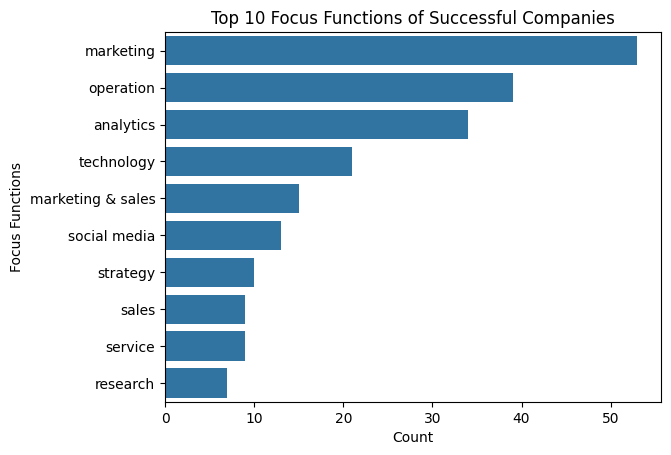

In [106]:
companyfocus = CompanyFocus(awards.df)
companyfocus.plot_dependence()
columns_for_model.append('Focus functions of company')
columns_for_model.append('Dependent-Company Status')
df = companyfocus.df

## **ML MODEL MAKING**

### **Data preporation**

In [107]:
ml = MlDataPrepare(companyfocus.df, columns_for_model)
df = ml.prepare_data()

C:\Users\Mikayel\PycharmProjects\InternshipTask\Functions\ml_data_preparing.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['Founder Experience'] = self.df['Founder Experience'].astype(int)
C:\Users\Mikayel\PycharmProjects\InternshipTask\Functions\ml_data_preparing.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['Has the team size grown'] = self.df['Has the team size grown'].replace(
C:\Users\Mikayel\PycharmProjects\InternshipTask\Functions\ml_data_preparing.py:27: SettingWithCopyW

###  **Data spliting**

In [108]:
columns_for_model.remove('Dependent-Company Status')
X = df[columns_for_model]
y = df['Dependent-Company Status']

49     Failed
135    Failed
136    Failed
137    Failed
138    Failed
        ...  
459    Failed
460    Failed
461    Failed
462    Failed
463    Failed
Name: Dependent-Company Status, Length: 132, dtype: object

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=100)

### **Random Forest**

In [110]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.9076923076923077


### **Support Vector Machine**

In [111]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("Support Vector Machine Accuracy:", svm_accuracy)

Support Vector Machine Accuracy: 0.8


### **Neural Network**

In [112]:
mlp_model = MLPClassifier()
mlp_model.fit(X_train, y_train)
mlp_pred = mlp_model.predict(X_test)
mlp_accuracy = accuracy_score(y_test, mlp_pred)
print("Neural Network Accuracy:", mlp_accuracy)

Neural Network Accuracy: 0.8461538461538461


C:\Users\Mikayel\PycharmProjects\InternshipTask\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### **Decision Tree**

In [113]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.8615384615384616


### **Saving Effisient Models**

In [114]:
dump(rf_model, 'rf_model.joblib')
dump(dt_model, 'dt_model.joblib')